In [1]:
import numpy as np 
import pandas as pd 
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV, train_test_split 

# Task 1: Reading the file

In [ ]:
cruise = pd.read_csv("cruise_ship_info.csv")

# Task 2: Table of basic statistics of the data

In [2]:
cruise.describe() 

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


# Task 8: Pearson's correlation coefficients for the dataset

In [3]:
cruise.corr(method='pearson') #Generates correlation matrix

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Age,1.000000,-0.606646,-0.515542,-0.532286,-0.510019,-0.278830,-0.530657
Tonnage,-0.606646,1.000000,0.945061,0.922368,0.948764,-0.040846,0.927569
passengers,-0.515542,0.945061,1.000000,0.883535,0.976341,-0.294867,0.915234
length,-0.532286,0.922368,0.883535,1.000000,0.889798,-0.090488,0.895857
cabins,-0.510019,0.948764,0.976341,0.889798,1.000000,-0.253181,0.950823
passenger_density,-0.278830,-0.040846,-0.294867,-0.090488,-0.253181,1.000000,-0.155509
crew,-0.530657,0.927569,0.915234,0.895857,0.950823,-0.155509,1.000000


# Task 3 & 4 : Selecting useful columns and dropping unnecessary columns

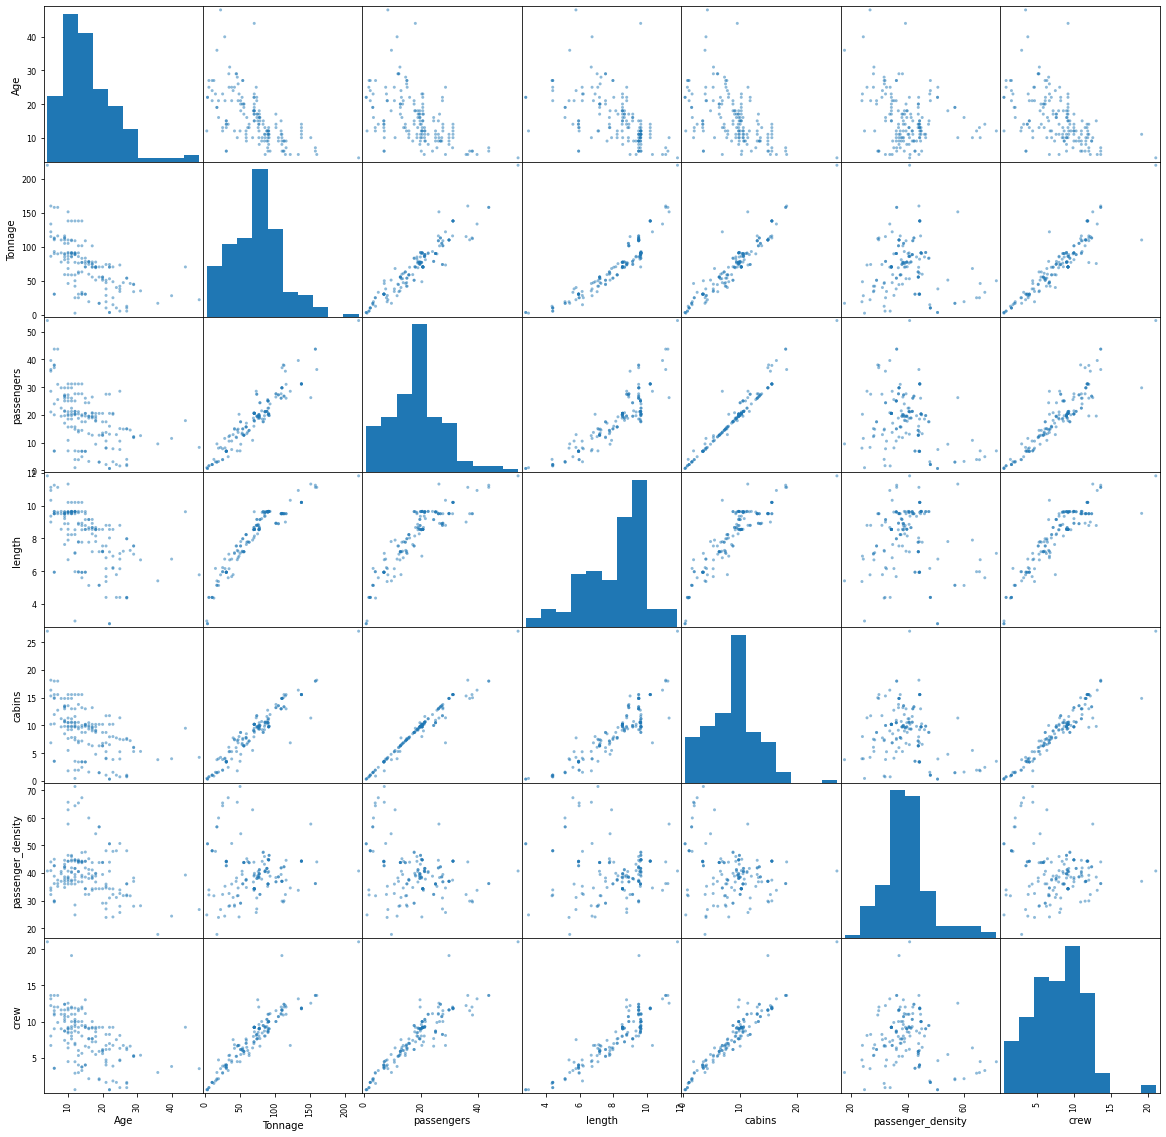

In [4]:
scatter_matrix(cruise, figsize=(20, 20))
plt.show()

# **Observations:**

"crew" field is:
* negatively correlated to "Age", 
* not correlated to "passenger_density"
* positively correlated with "Tonnage", "passengers", "length", and "cabins"

Therefore, "passenger_density" and "Age" fields will be dropped. 

In [5]:
cols_drop1 = ['Ship_name', 'Cruise_line', 'passenger_density', 'crew']
cols_drop2 = ['Ship_name', 'Cruise_line','Age', 'passenger_density', 'crew']
y = cruise.crew #Target variable
X = cruise.drop(cols_drop2, axis=1)

# Task 5: One Hot Encoding
One Hot Encoding can be achieved using sklearn's OneHotEncoder and the pd.get_dummies() method. However, here the categorical variables are "Ship_name" and "Cruise_line", and they have several categories within them which when encoded would yield lots of rows making the overall dataset unnecessarily larger. Furthermore, these variable are not important for prediction of crew size. Therefore, it is best to avoid One Hot Encoding here.

In [6]:
#Task 6: Train test splitting with 40% of the data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [8]:
#Task 7: Basic model and evaluation
model1 = XGBRegressor()
model1.fit(X_train, y_train)

pred1 = model1.predict(X_test)
mse1 = metrics.mean_squared_error(y_test, pred1)
sc1 = model1.score(X_test, y_test)
print("mse: %f \t\t score: %f" % (mse1, sc1))

mse: 2.465623 		 score: 0.801014


When I ran the above, the following values were printed:

*mse: 2.465623 		 score: 0.801014 *

Since it's a basic model, the score is quite low and the error is high. Evidently, it needs optimisation to be more efficient.

# Task 9: Model optimisation and evaluation
So far I haven't added or modified any hyperparameters in the model. But now I'm going to add and optimise the following hyperparameters: objective, booster, n_estimators, and learning_rate.
I'm going to use the GridSearchCV technique to find the best possible values for these hyperparameters.

In [24]:
params = {
    'n_estimators': np.arange(0,200,10), 
    'learning_rate':np.arange(0.1,1,0.05)
}
xgb = XGBRegressor(objective='reg:squarederror', booster='gblinear',random_state=1)
gc = GridSearchCV(xgb, params, cv=5).fit(X_train, y_train)

In [25]:
gc.best_estimator_

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.9000000000000002, max_delta_step=None,
             max_depth=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=180, n_jobs=0,
             num_parallel_tree=None, random_state=1, reg_alpha=0, reg_lambda=0,
             scale_pos_weight=1, subsample=None, tree_method=None,
             validate_parameters=1, verbosity=None)

# Note: 
Since this is a linear regression problem, "objective" has been set to  "reg:squarederror" and "booster" has been sert to "gblinear" in order to maximise the efficiency of the model. One can print the following line to see all the parameters and their values:
*gc.best_params_ 

In [26]:
model2 = gc.best_estimator_ #Gets the best estimator with the optimised parameters
pred2 = model2.predict(X_test)
mse2 = metrics.mean_squared_error(y_test, pred2)
sc2 = model2.score(X_test, y_test)
print("mse: %f \t\t score: %f" % (mse2, sc2))

mse: 1.039623 		 score: 0.916098


We can see that the optimised model performs much better and has a lower MSE than the previous model.

If we want we can verify the validity of the optimised parameters by plotting parameter versus score graphs, for example, learning_rate vs score, etc. 
Example:

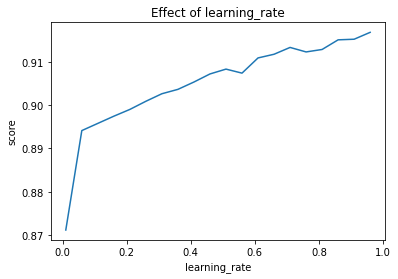

In [11]:
lr = np.arange(0.01,1,0.05)
scores = []
xg = XGBRegressor(n_estimators=180, objective='reg:squarederror', booster='gblinear', random_state=0)
for n in lr:     
    xg.set_params(learning_rate=n)
    xg.fit(X_train, y_train)
    scores.append(xg.score(X_test, y_test))
    
plt.title("Effect of learning_rate")
plt.xlabel("learning_rate")
plt.ylabel("score")
plt.plot(lr, scores)

# Task 10: 
Regularization is the technique of adding constant terms to erroneous higher degree terms and trying to reducde their overall effect on the model in order to prevent overfitting of the model on the data. 

If we print gc.best_estimator_ , we'll see that the alpha and lambda regularization terms have been set to 0, ie. reg_alpha=0, reg_lambda=0. The effects of the regularization paramters on the model can be observed in the below.

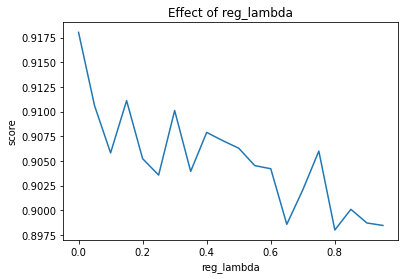

In [14]:
lr = np.arange(0.00,1,0.05)
scores = []
#xg = XGBRegressor(n_estimators=180, learning_rate=0.95, reg_alpha=0, objective='reg:squarederror', booster='gblinear', random_state=0)
xg = gc.best_estimator_
for n in lr:
    xg.set_params(reg_lambda=n)
    xg.fit(X_train, y_train)
    scores.append(xg.score(X_test, y_test))
    
plt.title("Effect of reg_lambda")
plt.xlabel("reg_lambda")
plt.ylabel("score")
plt.plot(lr, scores)

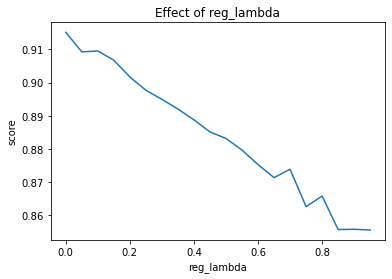

In [15]:
lr = np.arange(0.00,1,0.05)
scores = []
#xg = XGBRegressor(n_estimators=180, learning_rate=0.95, reg_alpha=0, objective='reg:squarederror', booster='gblinear', random_state=0)
xg = gc.best_estimator_
xg.set_params(reg_lambda=0.15)
for n in lr:
    xg.set_params(reg_alpha=n)
    xg.fit(X_train, y_train)
    scores.append(xg.score(X_test, y_test))
    
plt.title("Effect of reg_lambda")
plt.xlabel("reg_lambda")
plt.ylabel("score")
plt.plot(lr, scores)